In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

df = pd.read_csv('data.csv')
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [6]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [8]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

Сгруппируйте данные по дате, посчитайте количество продаж

In [12]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество продаж')

Вывести несколько первых строк сгруппированных данных

In [15]:
print(grouped_df.head())

        Дата  Количество продаж
0 2018-01-04               1840
1 2018-01-05               1301
2 2018-01-06               1306
3 2018-01-07               1322
4 2018-01-09               1719


Нарисуйте график продаж у `grouped_df`

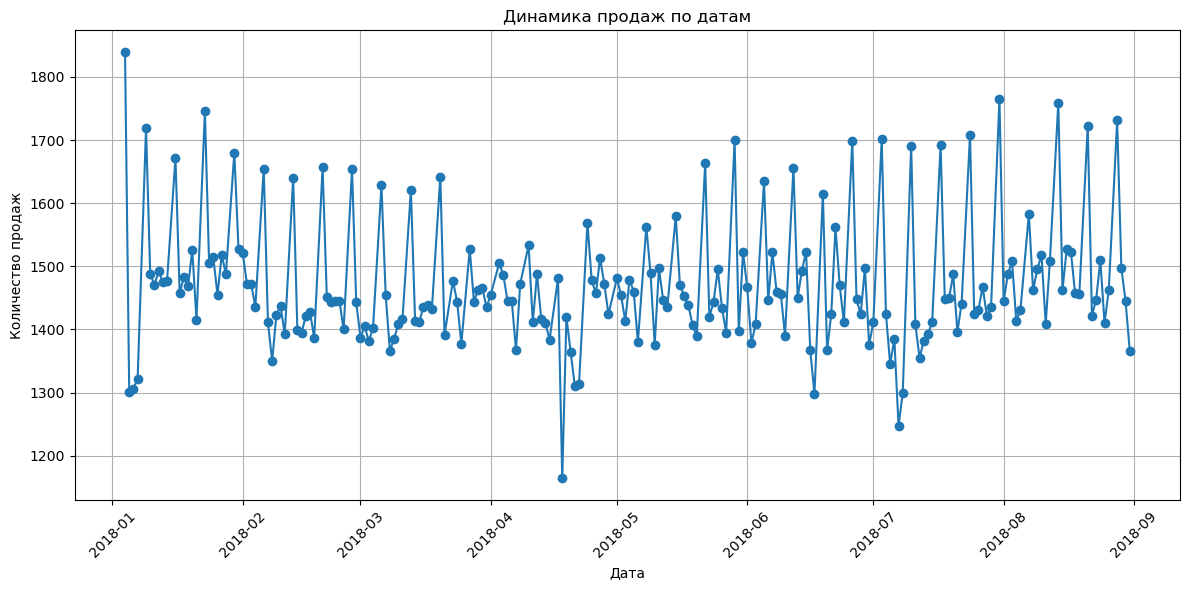

In [17]:
import matplotlib.pyplot as plt

# Строим график
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество продаж'], marker='o')

# Подписи и оформление
plt.title('Динамика продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.xticks(rotation=45)

# Показать график
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
 Колебания и выбросы
Регулярные колебания (вверх-вниз) в пределах ±100–200 продаж — это может быть сезонность или поведенческие паттерны покупателей.
Явные выбросы вверх — особенно в самом начале января (более 1800 продаж в день). Это может быть эффект праздников или маркетинговых акций.
Есть и резкие провалы (около 1250 продаж), они могут сигнализировать о:
выходных,
сбоях в системе,
снижении активности.
Периодичность
Видны циклы, примерно раз в 7 дней. Это может быть связано с неделями (повышенные продажи в выходные или будни).
Пики и провалы следуют с определённой регулярностью — вероятно, это календарные или поведенческие шаблоны.
Январь–февраль: плавное снижение продаж после новогоднего пика.
Март–апрель: период стабилизации на уровне 1400–1550 продаж в день.
Май–август: увеличилась амплитуда колебаний. Продажи становятся менее предсказуемыми, возможно из-за начала отпускного сезона или нестабильного спроса.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [19]:
q1 = grouped_df['Количество продаж'].quantile(0.25)
q3 = grouped_df['Количество продаж'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr

outliers = grouped_df[grouped_df['Количество продаж'] > upper_bound]

max_outlier = outliers.sort_values(by='Количество продаж', ascending=False).head(1)

print(max_outlier)

        Дата  Количество продаж
0 2018-01-04               1840


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [27]:
import pandas as pd

df = pd.read_csv('data.csv')

df['Дата'] = pd.to_datetime(df['Дата'])

summer_df = df[df['Дата'].dt.month.isin([6, 7, 8])]

wednesdays_df = summer_df[summer_df['Дата'].dt.weekday == 2]

warehouse_3_df = wednesdays_df[wednesdays_df['Склад'] == 3]

grouped = warehouse_3_df.groupby('Номенклатура')['Количество'].sum().reset_index()

top_product = grouped.sort_values(by='Количество', ascending=False).head(1)

print("Топовый товар по средам за июнь-август на складе №3:")
print(top_product)

Топовый товар по средам за июнь-август на складе №3:
  Номенклатура  Количество
1    product_1        2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [100]:
import pandas as pd


df_weather = pd.read_csv('weather_astana_2018.csv', skiprows=6)


In [112]:
df_merged = pd.merge(grouped_df, df_weather, on='Дата', how='left')

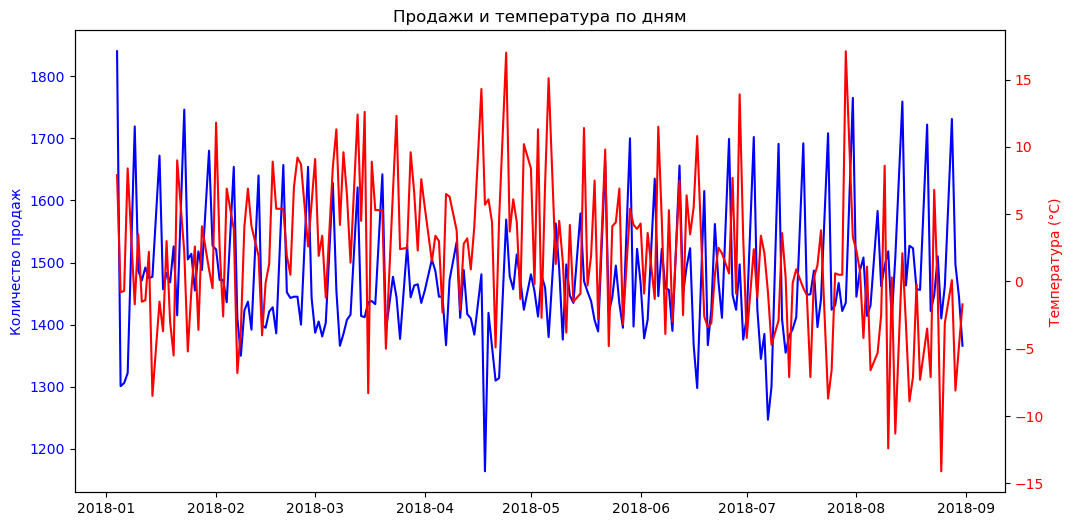

In [114]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_merged['Дата'], df_merged['Количество продаж'], label='Количество продаж', color='blue')
ax1.set_ylabel('Количество продаж', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df_merged['Дата'], df_merged['T'], label='Температура', color='red')
ax2.set_ylabel('Температура (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Продажи и температура по дням')
plt.show()

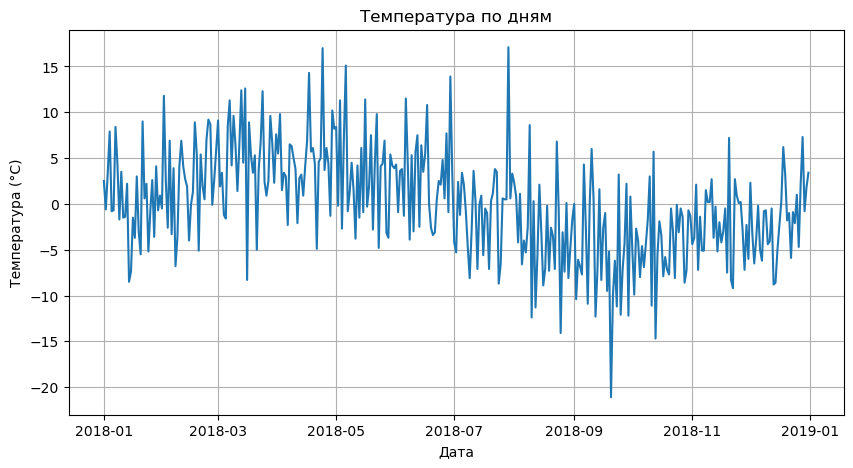

In [116]:
plt.figure(figsize=(10, 5))
plt.plot(df_weather['Дата'], df_weather['T'])
plt.title('Температура по дням')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.grid(True)
plt.show()